# Test et Visualisation des Métriques Avancées

Ce notebook permet de tester et visualiser toutes les nouvelles métriques avancées :
- Embeddings et similarité sémantique
- Métriques avancées (perplexité, diversité lexicale)
- Graphes sémantiques enrichis
- Visualisations


## 1. Imports et Configuration


In [1]:
import sys
from pathlib import Path
import json
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Ajouter le répertoire src au path
sys.path.insert(0, str(Path.cwd() / "src"))

from src.comparison.helpers import compute_metrics
from src.semantic.graph_visualization import visualize_semantic_graph
from src.semantic.graph_builder import expand_graph_with_embeddings

# Configuration pour les visualisations
plt.style.use('default')
%matplotlib inline


## 2. Test des Métriques de Base


In [2]:
# Test simple sans topic_graph
poem_test = """Dans l'océan de l'oubli, où je me retrouve,
Les vagues me coupent, mais sans violence,
Car voilà les souvenirs, les taches de feu,
Qui me maintiennent, malgré les ténèbres."""

metrics_basic = compute_metrics(poem_test)
print("Métriques de base calculées:")
for key, value in metrics_basic.items():
    print(f"  {key}: {value}")


Métriques de base calculées:
  word_count: 29
  line_count: 4
  char_count: 172
  vocab_size: 23
  avg_line_length: 42.25


## 3. Test des Métriques Avancées avec Graphe Thématique


In [3]:
# Définir un graphe thématique
topic_graph = {
    "nodes": ["deuil", "mémoire", "océan"],
    "edges": [["deuil", "mémoire"], ["mémoire", "océan"]]
}

print("Graphe thématique:")
print(f"  Nœuds: {topic_graph['nodes']}")
print(f"  Arêtes: {topic_graph['edges']}")


Graphe thématique:
  Nœuds: ['deuil', 'mémoire', 'océan']
  Arêtes: [['deuil', 'mémoire'], ['mémoire', 'océan']]


In [4]:
# Poème de test avec plusieurs strophes
poem_advanced = """Dans l'océan de l'oubli, où je me retrouve,
Les vagues me coupent, mais sans violence,
Car voilà les souvenirs, les taches de feu,
Qui me maintiennent, malgré les ténèbres.

La mémoire des rêves, qui m'attirent,
Et des lunes, qui me regardent, si calme,
Les bateaux de l'amour, qui se faisaient
Rêveur de bonheur, et des rêves qui ne s'arrêtaient.

Mais dans l'océan, où j'essaye de plonger,
Je trouve la force, je trouve la liberté,
Car dans la mémoire, je trouve la vie,
Et dans l'océan, je trouve la liberté."""


metrics_advanced = compute_metrics(poem_advanced, topic_graph)

print("\nMétriques calculées")
print(f"\nMétriques de base ({len([k for k in metrics_advanced.keys() if k in ['word_count', 'line_count', 'char_count', 'vocab_size', 'avg_line_length']])}):")
for key in ['word_count', 'line_count', 'char_count', 'vocab_size', 'avg_line_length']:
    if key in metrics_advanced:
        print(f"  {key}: {metrics_advanced[key]}")

print(f"\nMétriques embeddings ({len([k for k in metrics_advanced.keys() if 'graph' in k or 'coherence' in k])}):")
for key in ['graph_mean_similarity', 'graph_max_similarity', 'graph_min_similarity', 'graph_coverage', 
            'mean_consecutive_similarity', 'overall_coherence', 'coherence_std']:
    if key in metrics_advanced:
        print(f"  {key}: {metrics_advanced[key]:.4f}")

print(f"\nMétriques avancées ({len([k for k in metrics_advanced.keys() if k in ['perplexity', 'type_token_ratio', 'lexical_richness']])}):")
for key in ['perplexity', 'type_token_ratio', 'unique_word_ratio', 'lexical_richness']:
    if key in metrics_advanced:
        print(f"  {key}: {metrics_advanced[key]:.4f}")


pytorch_model.bin:   0%|          | 0.00/550M [00:00<?, ?B/s]


Métriques calculées

Métriques de base (5):
  word_count: 89
  line_count: 12
  char_count: 511
  vocab_size: 47
  avg_line_length: 41.5

Métriques embeddings (6):
  graph_mean_similarity: 0.0415
  graph_max_similarity: 0.0424
  graph_min_similarity: 0.0396
  graph_coverage: 0.0000
  mean_consecutive_similarity: 0.5625
  overall_coherence: 0.5805
  coherence_std: 0.0870

Métriques avancées (3):
  perplexity: 73.4456
  type_token_ratio: 0.5281
  unique_word_ratio: 0.5281
  lexical_richness: 52.8090


## 4. Visualisation du Graphe Sémantique


In [5]:
# Visualiser le graphe thématique
print("Visualisation du graphe thématique...")
visualize_semantic_graph(topic_graph, save_path="graph_thematique.png")
print("✓ Graphe sauvegardé dans graph_thematique.png")


Visualisation du graphe thématique...
Graphe sauvegardé dans graph_thematique.png
✓ Graphe sauvegardé dans graph_thematique.png


## 5. Expansion du Graphe avec Embeddings


In [6]:
# Enrichir le graphe avec des mots sémantiquement proches
print("Expansion du graphe avec embeddings...")
print("(Peut prendre du temps pour charger le modèle)")

expanded_graph = expand_graph_with_embeddings(topic_graph, top_k=5)

if "expanded_nodes" in expanded_graph:
    print("\n=== Graphe enrichi ===")
    for node, data in expanded_graph["expanded_nodes"].items():
        lexical_field = data.get("lexical_field", [])
        similarities = data.get("similarities", [])
        if lexical_field:
            print(f"\n{node}:")
            for word, sim in zip(lexical_field, similarities):
                print(f"  - {word} (similarité: {sim:.3f})")


Expansion du graphe avec embeddings...
(Peut prendre du temps pour charger le modèle)


model.safetensors:   0%|          | 0.00/550M [00:00<?, ?B/s]


=== Graphe enrichi ===

deuil:
  - silence (similarité: 1.000)
  - mort (similarité: 1.000)
  - musique (similarité: 1.000)
  - crépuscule (similarité: 1.000)
  - passé (similarité: 1.000)

mémoire:
  - mémoire (similarité: 1.000)
  - voix (similarité: 1.000)
  - souvenir (similarité: 1.000)
  - crépuscule (similarité: 1.000)
  - force (similarité: 1.000)

océan:
  - océan (similarité: 1.000)
  - vague (similarité: 1.000)
  - force (similarité: 1.000)
  - futur (similarité: 1.000)
  - lumière (similarité: 1.000)


## 6. Analyse des Résultats Existants


In [7]:
# Charger un résultat existant
results_file = Path("results/comparison/comparison_20251223_024634.json")

if results_file.exists():
    with open(results_file, "r", encoding="utf-8") as f:
        existing_data = json.load(f)
    
    print("✓ Fichier de résultats chargé")
    print(f"  Timestamp: {existing_data.get('timestamp', 'N/A')}")
    print(f"  Nombre d'approches: {len(existing_data.get('approaches', {}))}")
    
    topic_graph_existing = existing_data["config"]["topic_graph"]
else:
    print("⚠ Fichier de résultats non trouvé")
    existing_data = None


✓ Fichier de résultats chargé
  Timestamp: 20251223_024634
  Nombre d'approches: 4


In [8]:
# Recalculer les métriques pour chaque approche
if existing_data:
    print("Recalcul des métriques avec les nouvelles fonctionnalités...")
    print("(Peut prendre du temps pour charger les modèles)")
    
    results_comparison = {}
    
    for approach_name, approach_data in existing_data["approaches"].items():
        poem = approach_data["poem"]
        print(f"\n{approach_name}...")
        
        # Calculer avec les nouvelles métriques
        new_metrics = compute_metrics(poem, topic_graph_existing)
        results_comparison[approach_name] = {
            "description": approach_data["description"],
            "poem": poem,
            "old_metrics": approach_data["metrics"],
            "new_metrics": new_metrics
        }
    
    print("\n✓ Toutes les métriques recalculées")


Recalcul des métriques avec les nouvelles fonctionnalités...
(Peut prendre du temps pour charger les modèles)

baseline...

structure_only...

specialization_only...

structure_specialization...

✓ Toutes les métriques recalculées


## 7. Visualisation Comparative des Métriques


In [9]:
# Créer un DataFrame pour la comparaison
if existing_data and 'results_comparison' in locals():
    comparison_data = []
    
    for approach_name, data in results_comparison.items():
        row = {"Approche": data["description"]}
        metrics = data["new_metrics"]
        
        # Métriques de base
        row["Mots"] = metrics.get("word_count", 0)
        row["Lignes"] = metrics.get("line_count", 0)
        row["Vocabulaire"] = metrics.get("vocab_size", 0)
        
        # Métriques embeddings
        row["Similarité graphe (moy)"] = metrics.get("graph_mean_similarity", 0)
        row["Similarité graphe (max)"] = metrics.get("graph_max_similarity", 0)
        row["Cohérence globale"] = metrics.get("overall_coherence", 0)
        
        # Métriques avancées
        row["Perplexité"] = metrics.get("perplexity", 0)
        row["Diversité lexicale"] = metrics.get("type_token_ratio", 0)
        
        comparison_data.append(row)
    
    df_comparison = pd.DataFrame(comparison_data)
    
    print("=== Tableau Comparatif ===")
    print(df_comparison.to_string(index=False))
else:
    print("⚠ Données de comparaison non disponibles")


=== Tableau Comparatif ===
                            Approche  Mots  Lignes  Vocabulaire  Similarité graphe (moy)  Similarité graphe (max)  Cohérence globale  Perplexité  Diversité lexicale
    Modèle générique + prompt simple   158      15           89                -0.020950                -0.018724           0.386453   78.539347            0.560510
Modèle générique + graphe thématique   124      15           71                 0.079338                 0.082848           0.384701   88.807284            0.569106
    Modèle fine-tuné + prompt simple   143      17           82                 0.001437                 0.004052           0.426511   89.154897            0.574468
Modèle fine-tuné + graphe thématique   107      15           36                 0.030309                 0.031680           0.705906   79.136186            0.336449


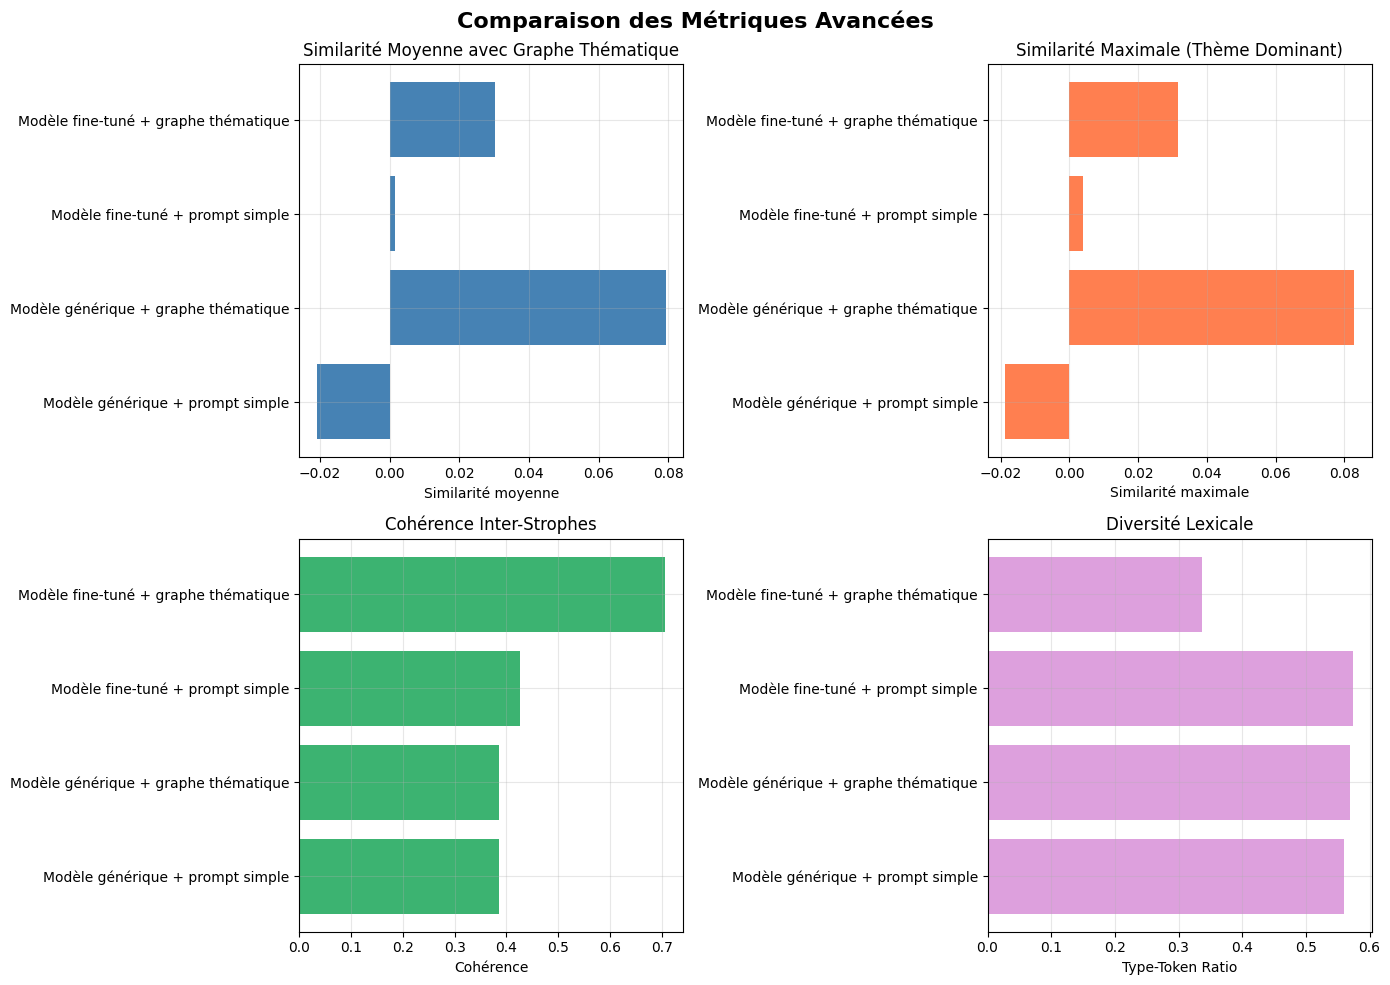

✓ Graphiques sauvegardés dans comparison_metrics.png


In [10]:
# Visualiser les métriques de similarité avec le graphe
if 'df_comparison' in locals() and not df_comparison.empty:
    fig, axes = plt.subplots(2, 2, figsize=(14, 10))
    fig.suptitle("Comparaison des Métriques Avancées", fontsize=16, fontweight='bold')
    
    approaches = df_comparison["Approche"].values
    
    # Similarité moyenne avec graphe
    ax1 = axes[0, 0]
    ax1.barh(approaches, df_comparison["Similarité graphe (moy)"], color='steelblue')
    ax1.set_xlabel("Similarité moyenne")
    ax1.set_title("Similarité Moyenne avec Graphe Thématique")
    ax1.grid(True, alpha=0.3)
    
    # Similarité maximale
    ax2 = axes[0, 1]
    ax2.barh(approaches, df_comparison["Similarité graphe (max)"], color='coral')
    ax2.set_xlabel("Similarité maximale")
    ax2.set_title("Similarité Maximale (Thème Dominant)")
    ax2.grid(True, alpha=0.3)
    
    # Cohérence globale
    ax3 = axes[1, 0]
    ax3.barh(approaches, df_comparison["Cohérence globale"], color='mediumseagreen')
    ax3.set_xlabel("Cohérence")
    ax3.set_title("Cohérence Inter-Strophes")
    ax3.grid(True, alpha=0.3)
    
    # Diversité lexicale
    ax4 = axes[1, 1]
    ax4.barh(approaches, df_comparison["Diversité lexicale"], color='plum')
    ax4.set_xlabel("Type-Token Ratio")
    ax4.set_title("Diversité Lexicale")
    ax4.grid(True, alpha=0.3)
    
    plt.tight_layout()
    plt.savefig("comparison_metrics.png", dpi=150, bbox_inches='tight')
    plt.show()
    print("✓ Graphiques sauvegardés dans comparison_metrics.png")
else:
    print("⚠ Données non disponibles pour la visualisation")


## 8. Analyse Détaillée par Métrique


In [11]:
# Analyse détaillée des métriques d'embeddings
if 'results_comparison' in locals():
    print("=== Analyse Détaillée des Métriques d'Embeddings ===\n")
    
    for approach_name, data in results_comparison.items():
        metrics = data["new_metrics"]
        
        print(f"{data['description']}:")
        print(f"  Similarité moyenne avec graphe: {metrics.get('graph_mean_similarity', 0):.4f}")
        print(f"  Similarité maximale (thème dominant): {metrics.get('graph_max_similarity', 0):.4f}")
        print(f"  Similarité minimale: {metrics.get('graph_min_similarity', 0):.4f}")
        print(f"  Couverture des thèmes: {metrics.get('graph_coverage', 0):.2%}")
        print(f"  Cohérence consécutive: {metrics.get('mean_consecutive_similarity', 0):.4f}")
        print(f"  Cohérence globale: {metrics.get('overall_coherence', 0):.4f}")
        print(f"  Écart-type cohérence: {metrics.get('coherence_std', 0):.4f}")
        print()


=== Analyse Détaillée des Métriques d'Embeddings ===

Modèle générique + prompt simple:
  Similarité moyenne avec graphe: -0.0209
  Similarité maximale (thème dominant): -0.0187
  Similarité minimale: -0.0233
  Couverture des thèmes: 0.00%
  Cohérence consécutive: 0.3922
  Cohérence globale: 0.3865
  Écart-type cohérence: 0.2236

Modèle générique + graphe thématique:
  Similarité moyenne avec graphe: 0.0793
  Similarité maximale (thème dominant): 0.0828
  Similarité minimale: 0.0757
  Couverture des thèmes: 0.00%
  Cohérence consécutive: 0.4484
  Cohérence globale: 0.3847
  Écart-type cohérence: 0.2230

Modèle fine-tuné + prompt simple:
  Similarité moyenne avec graphe: 0.0014
  Similarité maximale (thème dominant): 0.0041
  Similarité minimale: -0.0001
  Couverture des thèmes: 0.00%
  Cohérence consécutive: 0.5548
  Cohérence globale: 0.4265
  Écart-type cohérence: 0.1604

Modèle fine-tuné + graphe thématique:
  Similarité moyenne avec graphe: 0.0303
  Similarité maximale (thème domin

## 9. Export des Résultats


In [12]:
# Sauvegarder les résultats enrichis
if 'results_comparison' in locals():
    from datetime import datetime
    
    output_data = {
        "timestamp": datetime.now().strftime("%Y%m%d_%H%M%S"),
        "config": existing_data["config"],
        "approaches": {}
    }
    
    for approach_name, data in results_comparison.items():
        output_data["approaches"][approach_name] = {
            "description": data["description"],
            "poem": data["poem"],
            "metrics": data["new_metrics"]
        }
    
    output_file = Path("results/comparison/comparison_enriched.json")
    output_file.parent.mkdir(parents=True, exist_ok=True)
    
    with open(output_file, "w", encoding="utf-8") as f:
        json.dump(output_data, f, ensure_ascii=False, indent=2)
    
    print(f"✓ Résultats enrichis sauvegardés dans {output_file}")
else:
    print("⚠ Aucune donnée à sauvegarder")


✓ Résultats enrichis sauvegardés dans results/comparison/comparison_enriched.json
